# Implement SGD on bston dataset
Dataset from sklearn load_boston

The GD is theta=theta-alpha*derivative(cost function)
equ=y=wtx+b; 
cost = (y-wtx-b)^2 
determinant wrt w=> -2(y-wtx-b)x 
determinant wrt b => -2(y-wtx-b); 
in general : loss*  These are in vec notation

h=np.dot(x,theta);
loss=h-y;
cost=np.sum(loss**2)/(2*m);
gradient=np.dot(xt,loss)/m;
theta=theta-alpha*gradient    

# Objective
Implement the model and compare the intercept and weights with sklearn

# Import data and libraries and split train and test by 80:20

In [31]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()
print(boston.data.shape)
boston.data[0:1]

y=np.array(boston.target)
x=np.array(boston.data)
from sklearn.preprocessing import normalize, StandardScaler
#x = normalize(x, norm='l1', axis=0)
#y = normalize(y.reshape(-1, 1), norm='l1', axis=0)
#y=y.ravel()
for i in range(len(x[1,:])):
        x[:,i] = ( (x[:,i] - np.min(x[:,i])) / (np.max(x[:,i]) - np.min(x[:,i])) )
        
x_train=x[0:450]
x_test=x[451:505]
y_train=y[0:450]
y_test=y[451:505]

(506, 13)


# Create my model and cost function to calculate cost

In [32]:
def getWeights(x):
    lenWeights = len(x[1,:]);
    weights = np.random.rand(lenWeights)
    bias = np.random.random();
    return weights,bias

def train(x,y,weights,bias,maxIter):
    converged = False;
    iterations = 1;
    m = len(x);
    alpha = 0.0001;
    
    while not converged:
            for i in range(len(x)):
                #idx=np.random.randint(m,size=200)
                htheta = np.dot(x[i,:], weights) + bias;
                # Calculate gradient
                error = htheta - y[i];
                grad = (alpha) * ( error * x[i,:] );
                # Update weights and bias
                weights = weights - grad;
                bias = bias - alpha * error;
                iterations = iterations + 1;
                #alpha=alpha/pow(iterations,.25)
                
                if iterations > maxIter:
                    converged = True;
                    break

    return weights.transpose(), bias


def predict(x, weights, bias):
    return np.dot(x,weights) + bias


# Use my model on boston data

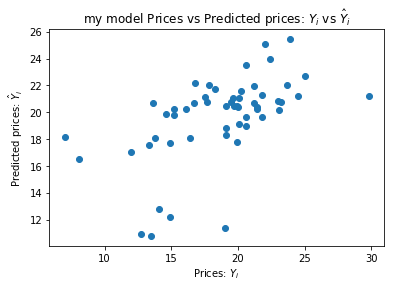

In [33]:
import warnings
warnings.filterwarnings('ignore')

initialWeights,initialBias = getWeights(x_train);
weights,bias = train(x_train,y_train,initialWeights,initialBias,50000);
y_pred_test = predict(x_test, weights,bias);
MSE_test1 = .5*np.mean((y_pred_test - y_test)**2);
y_pred_train = predict(x_train, weights,bias);
MSE_train= .5*np.mean((y_pred_train - y_train)**2);
#    sklearnModel = LinearRegression();
#    sklearnModel = sklearnModel.fit(x_train,y_train);
#    sklearnModel1 = sklearnModel.predict(x_test);

#    skMSE = .5*np.mean((sklearnModel1 - y_test)**2);
    
    #print ("Sklearn MSE: " + str(skMSE))
    #print("Sklearn coefficient",sklearnModel.intercept_,sklearnModel.coef_)
import pandas as pd    
aa=pd.DataFrame({'type':['MyModel'],'train_cost':[MSE_train],'test_cost':[MSE_test1],'Bias':[bias],'Coeff':[weights]})
    
    
plt.scatter(y_test, y_pred_test)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("my model Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()



# Use SGDREGRESSOR model on boston data

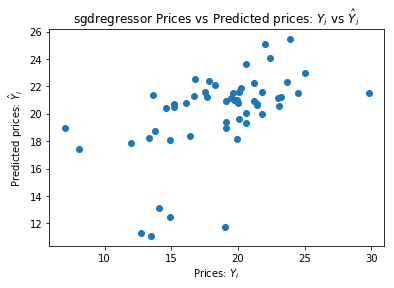

              Bias                                              Coeff  \
0          8.71079  [-0.695195996803, 4.4958842513, -0.33813337578...   
0  [8.71412791204]  [-0.927339319554, 3.46322494887, -0.6315953976...   

   test_cost  train_cost          type  
0    6.91357   27.323244       MyModel  
0    7.76666   28.759085  GSDRegressor  


In [34]:
import warnings
warnings.filterwarnings('ignore')

# Use sklearn
import pandas as pd
from sklearn.linear_model import SGDRegressor
lm = SGDRegressor(fit_intercept=True)
lm.fit(x_train, y_train)
#y_pred = lm.predict(x_test)
y_pred_test = lm.predict(x_test);
MSE_test = .5*np.mean((y_pred_test - y_test)**2);
y_pred_train = lm.predict(x_train);
MSE_train= .5*np.mean((y_pred_train - y_train)**2);

bb=pd.DataFrame({'type':['GSDRegressor'],'train_cost':[MSE_train],'test_cost':[MSE_test],'Bias':[lm.intercept_],'Coeff':[lm.coef_]})

aa=aa.append(bb)

plt.scatter(y_test, y_pred_test)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("sgdregressor Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

print(aa)

# Score comparision of mymodel and SGDregressor


<class 'list'> <class 'list'>


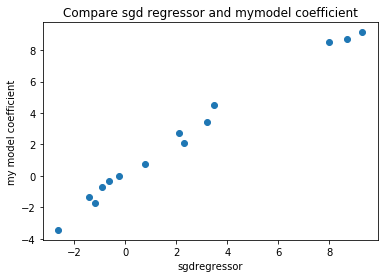

In [35]:
#print('sklearn coeff',lm.intercept_,lm.coef_)
#print('mymodel theta including intercept',newtheta[0],newtheta[1:])
x1=lm.intercept_.tolist()
x2=lm.coef_.tolist()
x1.extend(x2)
y1=[bias]
y2=weights.tolist()
print(type(y1),type(y2))
y1.extend(y2)
#y=newtheta.tolist()
import matplotlib.pyplot as plt
plt.title("Compare sgd regressor and mymodel coefficient")
plt.xlabel("sgdregressor")
plt.ylabel("my model coefficient")
plt.scatter(np.array(x1),np.array(y1))
plt.show()

# Observation
1. While trying learning rate of different value sometimes cost is going towards very high value, so tried with higher value
2. After trying more iteration cost is going down with a very small alpha value
3. SGD model is performing quite similar to mymodel
4. Best cost is achieved by different trial cost function
    5. Comparision of 2 models

In [36]:
print(aa)
print ("SGD MSE test: " + str(MSE_test))
print('coefficient of SGD model',lm.intercept_,lm.coef_)

print ("This Model MSE test: " + str(MSE_test1))
print("This model coefficient",bias,weights)


              Bias                                              Coeff  \
0          8.71079  [-0.695195996803, 4.4958842513, -0.33813337578...   
0  [8.71412791204]  [-0.927339319554, 3.46322494887, -0.6315953976...   

   test_cost  train_cost          type  
0    6.91357   27.323244       MyModel  
0    7.76666   28.759085  GSDRegressor  
SGD MSE test: 7.76666041996
coefficient of SGD model [ 8.71412791] [-0.92733932  3.46322495 -0.6315954   2.11319592 -0.25408998  7.98611331
  2.29493099  3.20762966 -1.42943032 -1.17873142  0.78229255  9.29748712
 -2.62239983]
This Model MSE test: 6.91357023558
This model coefficient 8.71078644939 [-0.695196    4.49588425 -0.33813338  2.74721491 -0.03185972  8.52556158
  2.08880604  3.43583274 -1.3375841  -1.72995185  0.7448961   9.11831041
 -3.41859194]
